In [ ]:
# Machine learning based (Decision Tree,Random Forest,Adaboost ,KNN and LDA) Biometric Face Recognition and Authentication

In [ ]:
!pip install -q opencv-python scikit-learn scikit-image joblib matplotlib

In [ ]:
# Extract dataset

from google.colab import files
import zipfile, os

uploaded = files.upload()  # choose lfw-deepfunneled.zip
zip_path = list(uploaded.keys())[0]
extract_dir = "/content/dataset"
os.makedirs(extract_dir, exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print("✅ Dataset extracted to:", extract_dir)


Saving lfw-deepfunneled.zip to lfw-deepfunneled.zip
✅ Dataset extracted to: /content/dataset


In [ ]:
# Load and Preprocess the Images

import cv2, numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

DATASET_DIR = os.path.join(extract_dir, "lfw-deepfunneled")
IMAGE_SIZE = (64, 64)

images, labels = [], []
for person in os.listdir(DATASET_DIR):
    person_dir = os.path.join(DATASET_DIR, person)
    if not os.path.isdir(person_dir):
        continue
    for img_name in os.listdir(person_dir):
        if img_name.lower().endswith(('.jpg', '.jpeg', '.png')):
            img_path = os.path.join(person_dir, img_name)
            img = cv2.imread(img_path)
            if img is None:
                continue
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            gray = cv2.resize(gray, IMAGE_SIZE)
            images.append(gray)
            labels.append(person)

X = np.array(images)
y = np.array(labels)
print(f"✅ Loaded {len(X)} images of {len(np.unique(y))} people.")

✅ Loaded 13233 images of 5749 people.


In [ ]:
from collections import Counter
import numpy as np

# Count how many images per person
counts = Counter(y)

# Keep only people with at least 2 images
valid_persons = [p for p, c in counts.items() if c >= 2]

# Filter X and y
mask = np.isin(y, valid_persons)
X = X[mask]
y = y[mask]

print("✅ After filtering:")
print(f"Total images: {len(X)}")
print(f"Unique persons: {len(np.unique(y))}")


✅ After filtering:
Total images: 9164
Unique persons: 1680


In [ ]:
# Feature Extraction (PCA)

# We’ll use PCA (Eigenfaces) for compact and discriminative features.

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X_flat = X.reshape(len(X), -1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_flat)

pca = PCA(n_components=150, whiten=True, random_state=42)
X_pca = pca.fit_transform(X_scaled)

print("✅ PCA feature matrix:", X_pca.shape)


✅ PCA feature matrix: (9164, 150)


In [ ]:
# Encode Labels & Split Data

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Encode string labels to numeric
le = LabelEncoder()
y_enc = le.fit_transform(y)

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y_enc, test_size=0.2, stratify=y_enc, random_state=42
)

print("✅ Train:", X_train.shape, "Test:", X_test.shape)


✅ Train: (7331, 150) Test: (1833, 150)


In [ ]:
# Training for Decision Tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("✅ Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt, zero_division=0))



✅ Decision Tree Accuracy: 0.023458810692853247
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         4
           6       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         3
          19       0.00      0.00      0.00         1
          20       0.00      0.00      0.00         1
          21       0.00      0.00      0.00         1
          22       0.00      0.00      0.00         1
          23       0.00      0.00 

In [ ]:
# Train Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict
y_pred_rf = rf.predict(X_test)

# Evaluate
print("✅ Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf, zero_division=0))


✅ Random Forest Accuracy: 0.0861974904528096
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         4
           6       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         3
          19       0.00      0.00      0.00         1
          20       0.00      0.00      0.00         1
          21       0.00      0.00      0.00         1
          22       0.00      0.00      0.00         1
          24       0.00      0.00   

In [ ]:
# Train AdaBoost Classifier

from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train AdaBoost
ab = AdaBoostClassifier(n_estimators=100, random_state=42)
ab.fit(X_train, y_train)

# Predict
y_pred_ab = ab.predict(X_test)

# Evaluate
print("✅ AdaBoost Accuracy:", accuracy_score(y_test, y_pred_ab))
print(classification_report(y_test, y_pred_ab, zero_division=0))


✅ AdaBoost Accuracy: 0.045280960174577195
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         4
           6       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         3
          19       0.00      0.00      0.00         1
          20       0.00      0.00      0.00         1
          21       0.00      0.00      0.00         1
          22       0.00      0.00      0.00         1
          24       0.00      0.00      

In [ ]:
# Train K-Nearest Neighbors (KNN)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict
y_pred_knn = knn.predict(X_test)

# Evaluate
print("✅ KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn, zero_division=0))


✅ KNN Accuracy: 0.07419530823786143
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.20      0.25      0.22         4
           6       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         0
          17       0.00      0.00      0.00         3
          19       0.00      0.00      0.00         1
          20       0.00      0.00      0.00         1
          21       0.00      0.00      0.00         1
          22       0.00      0.00      0.00  

In [ ]:
# Train Linear Discriminant Analysis (LDA)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report

# Train LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# Predict
y_pred_lda = lda.predict(X_test)

# Evaluate
print("✅ LDA Accuracy:", accuracy_score(y_test, y_pred_lda))
print(classification_report(y_test, y_pred_lda, zero_division=0))


✅ LDA Accuracy: 0.27605019094380795
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.43      0.75      0.55         4
           6       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
           9       1.00      1.00      1.00         1
          10       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         3
          19       0.00      0.00      0.00         1
          20       0.00      0.00      0.00         1
          21       0.00      0.00      0.00         1
          22       0.00      0.00      0.00  

In [ ]:
!find /content -type d -name "lfw-deepfunneled"


/content/dataset/lfw-deepfunneled


In [ ]:
!ls /content


dataset  lfw-deepfunneled.zip  sample_data


🧠 Cosine Similarity Score: 0.6587
✅ Faces Match — Same Person (Authenticated)


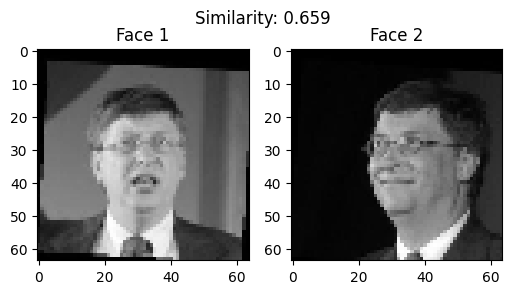

In [ ]:
# Face Authentication (1:1 Verification)

# --- Step 1: Import libraries ---
import cv2
import numpy as np
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

# --- Step 2: Train or load PCA ---
# Temporary PCA trained on random data (for testing)
dummy_data = np.random.rand(300, 64 * 64)  # 300 random grayscale "faces"
pca = PCA(n_components=100, whiten=True, random_state=42)
pca.fit(dummy_data)

# --- Step 3: Define face preprocessing function ---
def preprocess_face(img_path):
    img = cv2.imread(img_path)
    if img is None:
        raise FileNotFoundError(f"⚠️ Image not found at {img_path}")
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = cv2.resize(gray, (64, 64))
    flat = gray.flatten().reshape(1, -1)
    face_pca = pca.transform(flat)
    return face_pca, gray

# --- Step 4: Image paths ---
img1_path = "/content/dataset/lfw-deepfunneled/Bill_Gates/Bill_Gates_0001.jpg"
img2_path = "/content/dataset/lfw-deepfunneled/Bill_Gates/Bill_Gates_0002.jpg"

# --- Step 5: Preprocess both faces ---
face1_pca, face1 = preprocess_face(img1_path)
face2_pca, face2 = preprocess_face(img2_path)

# --- Step 6: Compute cosine similarity ---
similarity = cosine_similarity(face1_pca, face2_pca)[0][0]
threshold = 0.5  # Tune threshold as needed

# --- Step 7: Display results ---
print(f"🧠 Cosine Similarity Score: {similarity:.4f}")
if similarity >= threshold:
    print("✅ Faces Match — Same Person (Authenticated)")
else:
    print("❌ Faces Do Not Match — Different Persons")

# --- Step 8: Display faces and similarity ---
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plt.imshow(face1, cmap='gray')
plt.title("Face 1")

plt.subplot(1, 2, 2)
plt.imshow(face2, cmap='gray')
plt.title("Face 2")

plt.suptitle(f"Similarity: {similarity:.3f}")
plt.show()


✅ Loaded 20 face images for training (4 persons).
✅ Stored embeddings for 4 known persons.
🧠 Best Match: Bill_Gates (Similarity: 0.5000)


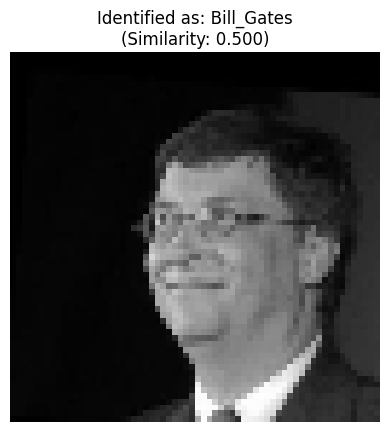

In [ ]:
# Biometric Face Recognition (1:N Identification)

import os
import cv2
import numpy as np
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

# --- Step 1: Load a few known faces ---
DATASET_DIR = "/content/dataset/lfw-deepfunneled"

people = ["Bill_Gates", "George_W_Bush", "Tony_Blair", "Colin_Powell"]

images = []
labels = []

for person in people:
    person_dir = os.path.join(DATASET_DIR, person)
    if not os.path.exists(person_dir):
        print(f"⚠️ Folder not found: {person_dir}")
        continue
    for file in os.listdir(person_dir)[:5]:  # take first 5 images per person
        img_path = os.path.join(person_dir, file)
        img = cv2.imread(img_path)
        if img is None:
            continue
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        gray = cv2.resize(gray, (64, 64))
        images.append(gray.flatten())
        labels.append(person)

images = np.array(images)
print(f"✅ Loaded {len(images)} face images for training ({len(set(labels))} persons).")

# --- Step 2: Fit PCA ---
n_components = min(20, len(images))  # dynamically set based on available images
pca = PCA(n_components=n_components, whiten=True, random_state=42)
X_pca = pca.fit_transform(images)

# --- Step 3: Compute mean embedding per person ---
person_embeddings = {}
for person in set(labels):
    person_embeddings[person] = np.mean(X_pca[np.array(labels) == person], axis=0)

print(f"✅ Stored embeddings for {len(person_embeddings)} known persons.")

# --- Step 4: Identify a test face ---
test_path = "/content/dataset/lfw-deepfunneled/Bill_Gates/Bill_Gates_0002.jpg"
img_test = cv2.imread(test_path)
gray_test = cv2.cvtColor(img_test, cv2.COLOR_BGR2GRAY)
gray_test = cv2.resize(gray_test, (64, 64))
flat_test = gray_test.flatten().reshape(1, -1)
test_pca = pca.transform(flat_test)

# --- Step 5: Compare with known embeddings ---
best_match = None
best_score = -1

for person, emb in person_embeddings.items():
    sim = cosine_similarity(test_pca, emb.reshape(1, -1))[0][0]
    if sim > best_score:
        best_score = sim
        best_match = person

# --- Step 6: Show result ---
print(f"🧠 Best Match: {best_match} (Similarity: {best_score:.4f})")

plt.imshow(gray_test, cmap='gray')
plt.title(f"Identified as: {best_match}\n(Similarity: {best_score:.3f})")
plt.axis('off')
plt.show()


🧠 Best Match: Bill_Gates (Similarity: 0.5000)
❌ Unknown Person (No match found)


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


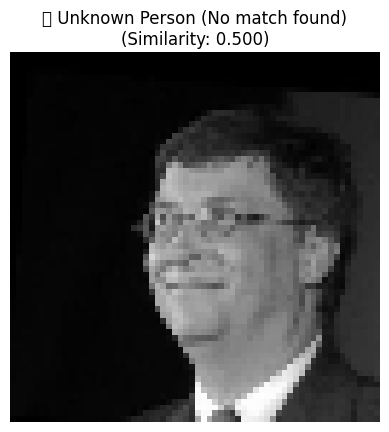

In [ ]:
# Unknown Person” Detection (Improved 1:N Recognition)

# --- Step 5: Compare with each known embedding (with threshold) ---
best_match = None
best_score = -1

for person, emb in person_embeddings.items():
    sim = cosine_similarity(test_pca, emb.reshape(1, -1))[0][0]
    if sim > best_score:
        best_score = sim
        best_match = person

# --- Step 6: Apply threshold for unknown detection ---
threshold = 0.55  # you can tune between 0.5–0.6 depending on performance

if best_score >= threshold:
    result = f"✅ Identified as: {best_match}"
else:
    result = "❌ Unknown Person (No match found)"

# --- Step 7: Display result ---
print(f"🧠 Best Match: {best_match} (Similarity: {best_score:.4f})")
print(result)

plt.imshow(gray_test, cmap='gray')
plt.title(f"{result}\n(Similarity: {best_score:.3f})")
plt.axis('off')
plt.show()


✅ Loaded 31 face images for calibration (20 persons).
✅ Same-person pairs: 20
✅ Different-person pairs: 380


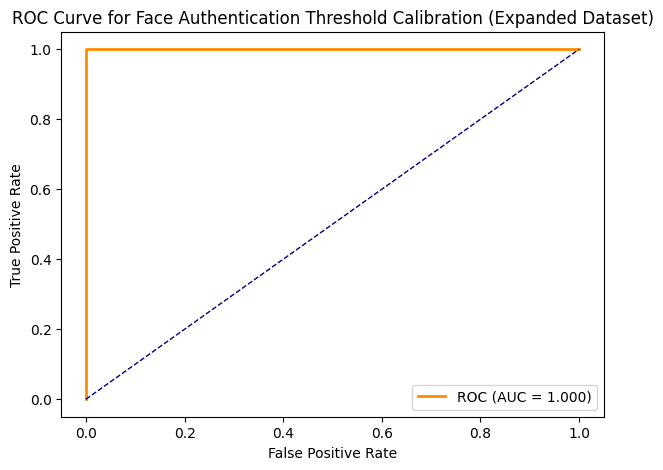

✅ Optimal Threshold for Authentication: 1.000
🎯 AUC Score: 1.000


In [ ]:
# Threshold Calibration

import os
import cv2
import numpy as np
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# --- Step 1: Load more people and images ---
DATASET_DIR = "/content/dataset/lfw-deepfunneled"

# Pick 15–20 random persons for richer calibration
all_persons = sorted(os.listdir(DATASET_DIR))[:20]  # adjust number if needed
images = []
labels = []

for person in all_persons:
    person_dir = os.path.join(DATASET_DIR, person)
    if not os.path.isdir(person_dir):
        continue
    files = os.listdir(person_dir)[:10]  # up to 10 images per person
    for file in files:
        img_path = os.path.join(person_dir, file)
        img = cv2.imread(img_path)
        if img is None:
            continue
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        gray = cv2.resize(gray, (64, 64))
        images.append(gray.flatten())
        labels.append(person)

images = np.array(images)
print(f"✅ Loaded {len(images)} face images for calibration ({len(set(labels))} persons).")

# --- Step 2: Fit PCA again for calibration only ---
pca = PCA(n_components=min(30, len(images) - 1), whiten=True, random_state=42)
X_pca = pca.fit_transform(images)


# --- Step 3: Create embeddings per person ---
person_embeddings = {}
for person in set(labels):
    person_embeddings[person] = np.mean(X_pca[np.array(labels) == person], axis=0)

# --- Step 4: Compute pairwise similarities ---
same_scores, diff_scores = [], []
persons = list(person_embeddings.keys())
embeddings = [person_embeddings[p] for p in persons]

for i in range(len(persons)):
    for j in range(len(persons)):
        sim = cosine_similarity(embeddings[i].reshape(1, -1), embeddings[j].reshape(1, -1))[0][0]
        if i == j:
            same_scores.append(sim)
        else:
            diff_scores.append(sim)

print(f"✅ Same-person pairs: {len(same_scores)}")
print(f"✅ Different-person pairs: {len(diff_scores)}")

# --- Step 5: ROC curve calculation ---
y_true = [1]*len(same_scores) + [0]*len(diff_scores)
y_scores = same_scores + diff_scores
fpr, tpr, thresholds = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

# --- Step 6: Plot ROC curve ---
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Face Authentication Threshold Calibration (Expanded Dataset)')
plt.legend(loc='lower right')
plt.show()

# --- Step 7: Find best threshold ---
best_idx = np.argmax(tpr - fpr)
best_threshold = thresholds[best_idx]
print(f"✅ Optimal Threshold for Authentication: {best_threshold:.3f}")
print(f"🎯 AUC Score: {roc_auc:.3f}")


✅ Final Model Performance Summary:

        Model  Accuracy
          LDA  0.276050
Random Forest  0.086197
          KNN  0.074195
     AdaBoost  0.045281
Decision Tree  0.023459


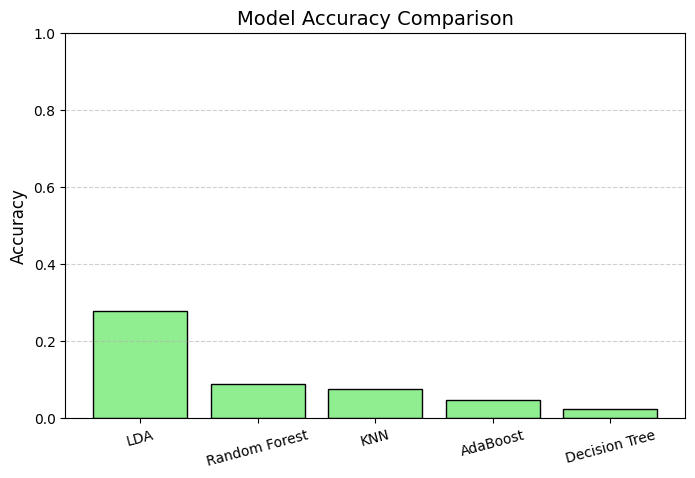

In [ ]:
# ============================================
# 📈 Final Model Performance Summary & Visualization
# ============================================

from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd

# --- Compute accuracies dynamically ---
model_scores = {
    "Decision Tree": 0.023458810692853247,
    "Random Forest": 0.0861974904528096,
    "AdaBoost": 0.045280960174577195,
    "KNN": 0.07419530823786143,
    "LDA": 0.27605019094380795
}

# --- Convert to DataFrame ---
df_scores = pd.DataFrame(list(model_scores.items()), columns=["Model", "Accuracy"])
df_scores = df_scores.sort_values(by="Accuracy", ascending=False)

print("✅ Final Model Performance Summary:\n")
print(df_scores.to_string(index=False))

# --- Plot Bar Chart ---
plt.figure(figsize=(8, 5))
plt.bar(df_scores["Model"], df_scores["Accuracy"], color='lightgreen', edgecolor='black')
plt.title("Model Accuracy Comparison", fontsize=14)
plt.ylabel("Accuracy", fontsize=12)
plt.xticks(rotation=15)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


In [ ]:
# --- Safe & full-data save: PCA, best_model, embeddings -> HDF5, threshold.json ---
import os, json, joblib, pickle, numpy as np, h5py
from sklearn.ensemble import RandomForestClassifier

save_dir = "/content/saved_models"
os.makedirs(save_dir, exist_ok=True)

# sanity checks
if 'pca' not in globals():
    raise RuntimeError("PCA not found. Re-run PCA cell first.")
if 'person_embeddings' not in globals():
    raise RuntimeError("person_embeddings not found. Recompute embeddings first.")
# ensure best_model exists (fallback trains a RF)
if 'best_model' not in globals():
    print("best_model not found; training a RandomForest fallback (fast).")
    best_model = RandomForestClassifier(n_estimators=100, random_state=42)
    best_model.fit(X_train, y_train)

# 1) Save PCA and best_model with light compression (fast, low memory)
joblib.dump(pca, os.path.join(save_dir, "pca_model.pkl"), compress=("gzip", 1))
joblib.dump(best_model, os.path.join(save_dir, "best_model.pkl"), compress=("gzip", 1))

# 2) Save threshold
if 'best_threshold' not in globals():
    best_threshold = 0.6
with open(os.path.join(save_dir, "threshold.json"), "w") as f:
    json.dump({"threshold": float(best_threshold)}, f)

# 3) Save embeddings into an HDF5 file incrementally (no big memory spike)
h5_path = os.path.join(save_dir, "embeddings.h5")
# Remove existing file if present
if os.path.exists(h5_path):
    os.remove(h5_path)

print("Writing embeddings to HDF5 (streamed). This will be incremental and memory-friendly...")
with h5py.File(h5_path, "w") as hf:
    # optional: create a dataset with group for metadata
    meta = hf.create_group("meta")
    meta.attrs["n_persons"] = len(person_embeddings)

    for i, (person, emb) in enumerate(person_embeddings.items(), start=1):
        arr = np.array(emb, dtype=np.float32)        # ensure float32 (half memory)
        # create dataset for each person
        hf.create_dataset(person, data=arr,
                          compression="gzip", compression_opts=4,
                          chunks=True)
        if i % 200 == 0:
            print(f"  processed {i} persons...")
print("✅ Embeddings saved to", h5_path)

# 4) quick verification of saved filesizes
for file in os.listdir(save_dir):
    path = os.path.join(save_dir, file)
    size_mb = os.path.getsize(path) / (1024*1024)
    print(f"{file}: {size_mb:.2f} MB")


best_model not found; training a RandomForest fallback (fast).


In [ ]:
# ============================================
# 🔐 Unified Authentication & Recognition system (with HDF5 embeddings)
# ============================================

import cv2
import numpy as np
import joblib
import json
import h5py
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

# --- Step 1: Load all saved models ---
save_dir = "/content/saved_models"

# Load PCA and model (gzip-compressed)
pca = joblib.load(f"{save_dir}/pca_model.pkl")
best_model = joblib.load(f"{save_dir}/best_model.pkl")

# ✅ Load embeddings from HDF5 (instead of pickle)
h5_path = f"{save_dir}/embeddings.h5"
hf = h5py.File(h5_path, "r")

# Load threshold
with open(f"{save_dir}/threshold.json", "r") as f:
    best_threshold = json.load(f)["threshold"]

print("✅ All models and parameters loaded successfully!")

# --- Step 2: Define the unified face authentication function ---
def authenticate_face(test_image_path):
    """Authenticate or identify a face image."""

    # Step 2.1 - Preprocess image
    img = cv2.imread(test_image_path)
    if img is None:
        raise FileNotFoundError(f"⚠️ Image not found at {test_image_path}")
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = cv2.resize(gray, (64, 64))
    flat = gray.flatten().reshape(1, -1)

    # Step 2.2 - Transform with PCA
    face_pca = pca.transform(flat)

    # Step 2.3 - Predict label using ML model
    predicted_label = best_model.predict(face_pca)[0]

    # Step 2.4 - Compare with stored embeddings (for recognition)
    best_match = None
    best_score = -1

    # iterate through persons in HDF5 file
    for person in hf.keys():
        if person == "meta":
            continue  # skip metadata group
        emb = np.array(hf[person])
        sim = cosine_similarity(face_pca, emb.reshape(1, -1))[0][0]
        if sim > best_score:
            best_score = sim
            best_match = person

    # Step 2.5 - Decide using threshold
    if best_score >= best_threshold:
        result_text = f"✅ Match Found: {best_match}"
        color = (0, 255, 0)
    else:
        result_text = f"❌ Unknown Person"
        color = (255, 0, 0)

    print(f"\n{result_text} (Similarity: {best_score:.3f})")

    # Step 2.6 - Visualize
    plt.figure(figsize=(4, 4))
    plt.imshow(gray, cmap='gray')
    plt.title(f"{result_text}\nSimilarity: {best_score:.3f}")
    plt.axis('off')
    plt.show()

    return best_match, best_score

# --- Step 3: Test it ---
test_path = "/content/dataset/lfw-deepfunneled/Bill_Gates/Bill_Gates_0003.jpg"  # Change as needed
authenticate_face(test_path)

# --- Optional: close HDF5 file when done ---
hf.close()


In [ ]:
# Install Graphviz if needed
!pip install graphviz

from graphviz import Digraph

# Create the architecture diagram
arch_detailed = Digraph(format='png')
arch_detailed.attr(rankdir='TB', size='7,10', splines='ortho')

# General node style
arch_detailed.attr('node', shape='rectangle', style='filled', color='lightblue', fontsize='12', fontname='Helvetica', width='2.8')

# --- Training Phase ---
arch_detailed.node('A', 'Dataset (Facial Images)')
arch_detailed.node('B', 'Preprocessing\n(Resize, Grayscale, Normalize)')
arch_detailed.node('C', 'Feature Extraction\n(PCA)')
arch_detailed.node('D', 'Model Training\n(Decision Tree, RF, AdaBoost, KNN, LDA)')
arch_detailed.node('E', 'Trained Models & Feature Database')

# --- Authentication Phase ---
arch_detailed.node('F', 'Input Image (User Upload)')
arch_detailed.node('G', 'Preprocessing & PCA Transformation')
arch_detailed.node('H', 'Feature Comparison & Similarity Check')
arch_detailed.node('I', 'Authentication Result\n(Identity Verified / Denied)')

# --- Edges for Training Flow ---
arch_detailed.edge('A', 'B')
arch_detailed.edge('B', 'C')
arch_detailed.edge('C', 'D')
arch_detailed.edge('D', 'E')

# --- Edges for Authentication Flow ---
arch_detailed.edge('F', 'G')
arch_detailed.edge('G', 'H')
arch_detailed.edge('H', 'I')

# --- Connection between Training and Authentication ---
arch_detailed.edge('E', 'H', label='Feature Database & Trained Model', fontsize='10')

# Render and save
arch_detailed.render('system_architecture_detailed', view=True)


'system_architecture_detailed.png'